# Exploratory Data Analysis (EDA): 

 Is a crucial initial step in the data analysis process. It involves examining and visualizing the dataset to understand its structure, patterns, and relationships between variables 
 
 our focus will be on applying EDA techniques to a titanic dataset.By exploring  dataset, we aim to gain insights into the factors that influence survival rates. Through the use of EDA techniques, such as summary statistics and visualizations, we hope to uncover valuable information that can contribute to our understanding .
 

In [212]:
#importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn  as sns

In [213]:
#loading data
data=pd.read_csv('/kaggle/input/titanic/train.csv')

Dataset Columns Summary:

1. PassengerId 
2. pclass: 1 = 1st (the most expensive one), 2 = 2nd, 3 = 3rd
3. sex: male, female
4. Age: age of passenger
5. sibsp: # of siblings/spouses aboard
6. parch: % of parents/children aboard
7. ticket: ticket id number
8. fare: price paid
9. cabin: cabin assignment (not every passenger had one)
10. embarked: C = Cherbourg, Q = Queenstown, S = Southampton

# Insights from the Dataset
 After importing the dataset, our first step is to check if the data is imported properly, we can use
>   **head( )** to display the top 5 observations of the dataset

> Similar to ***head( )***, we can use ***tail( )***,  If we want to display the last 5 , all we need to do is to mention the number in brackets.

>  ***df.shape*** to check the number of observations (rows) and features (columns) in the dataset

>To understand more about the data, including the number of non-null records in each columns, their data types, the memory usage of the dataset, we use ***info( )***

> To find the number of unique values corresponding to each column in the DataFrame, we use ***nunique( )***

In [214]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [215]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Dataset Columns Summary:

* PassengerId
* pclass: 1 = 1st (the most expensive one), 2 = 2nd, 3 = 3rd
* sex: male, female
* Age: age of passenger
* sibsp: # of siblings/spouses aboard
* parch: % of parents/children aboard
* ticket: ticket id number
* fare: price paid
* cabin: cabin assignment (not every passenger had one)
* embarked: C = Cherbourg, Q = Queenstown, S = Southampton

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [217]:
data.shape

(891, 12)

> The dataset comprises diverse features, each falling into distinct data types. Categorical features, such as :'Name','Sex','Ticket','Cabin','Embarked' are represented as object(string).

>Integer data types (int64) are assigned to 'PassengerId','Pclass','Age','SibSp','Parch','Fare','Survived'.

> In the presence of missing values, Age column has 86 missing vlaues and cabin has 327 missing value.
 Proper handling of missing values is crucial for maintaining the dataset’s integrity during subsequent  data analysis or modeling processes.
 
 

In [218]:
for column in data.columns:
    num_unique_values = data[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')


Number of unique values in PassengerId: 891
Number of unique values in Survived: 2
Number of unique values in Pclass: 3
Number of unique values in Name: 891
Number of unique values in Sex: 2
Number of unique values in Age: 88
Number of unique values in SibSp: 7
Number of unique values in Parch: 7
Number of unique values in Ticket: 681
Number of unique values in Fare: 248
Number of unique values in Cabin: 147
Number of unique values in Embarked: 3


# Descriptive Statistical Analysis

**The dataset contains values of all the attributes described earlier. Let us start by performing a descriptive statistical analysis of the dataset. We will use *describe()* for this.**

In [219]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning
Your data can have different sorts of quality issues. Therefore, it is essential that you clean your data. You do not want your data to be messy just like your room is nor do you want the values tampering with your data analysis , resulting in inaccuracies or inappropriate results. As a result, these issues must be addressed before data can be analyzed. There are many different data cleaning techniques, some of which are discussed below:

# 1. Handling Missing Values

Next step is to check for missing values in the dataset. It is very common for a dataset to have missing values. These missing values are represented by Noneor NaNvalues and are not supported by most machine learning algorithms.

There are three main types of missing data:

* Missing completely at random 
* Missing at random 
* Not missing at random 

We will use the ***isnull()*** function to get an idea of the amount of missing values in our dataset.

In [220]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows that there are missing values in the dataset, 177 exhibited by ‘Age’ ,2 by 'Embarked' and 687 by ‘Cabin’ .

**Inorder to find the percentage of missing values in the dataset, we use:**

In [221]:
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


# Visualising the missing values

It goes without doubt that we need to have a good understanding of how the NaN values are distributed in our dataset. **Missingno** library offers an efficient to visualize the distribution of NaN values. It is a Python library and compatible with Pandas.

In [222]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

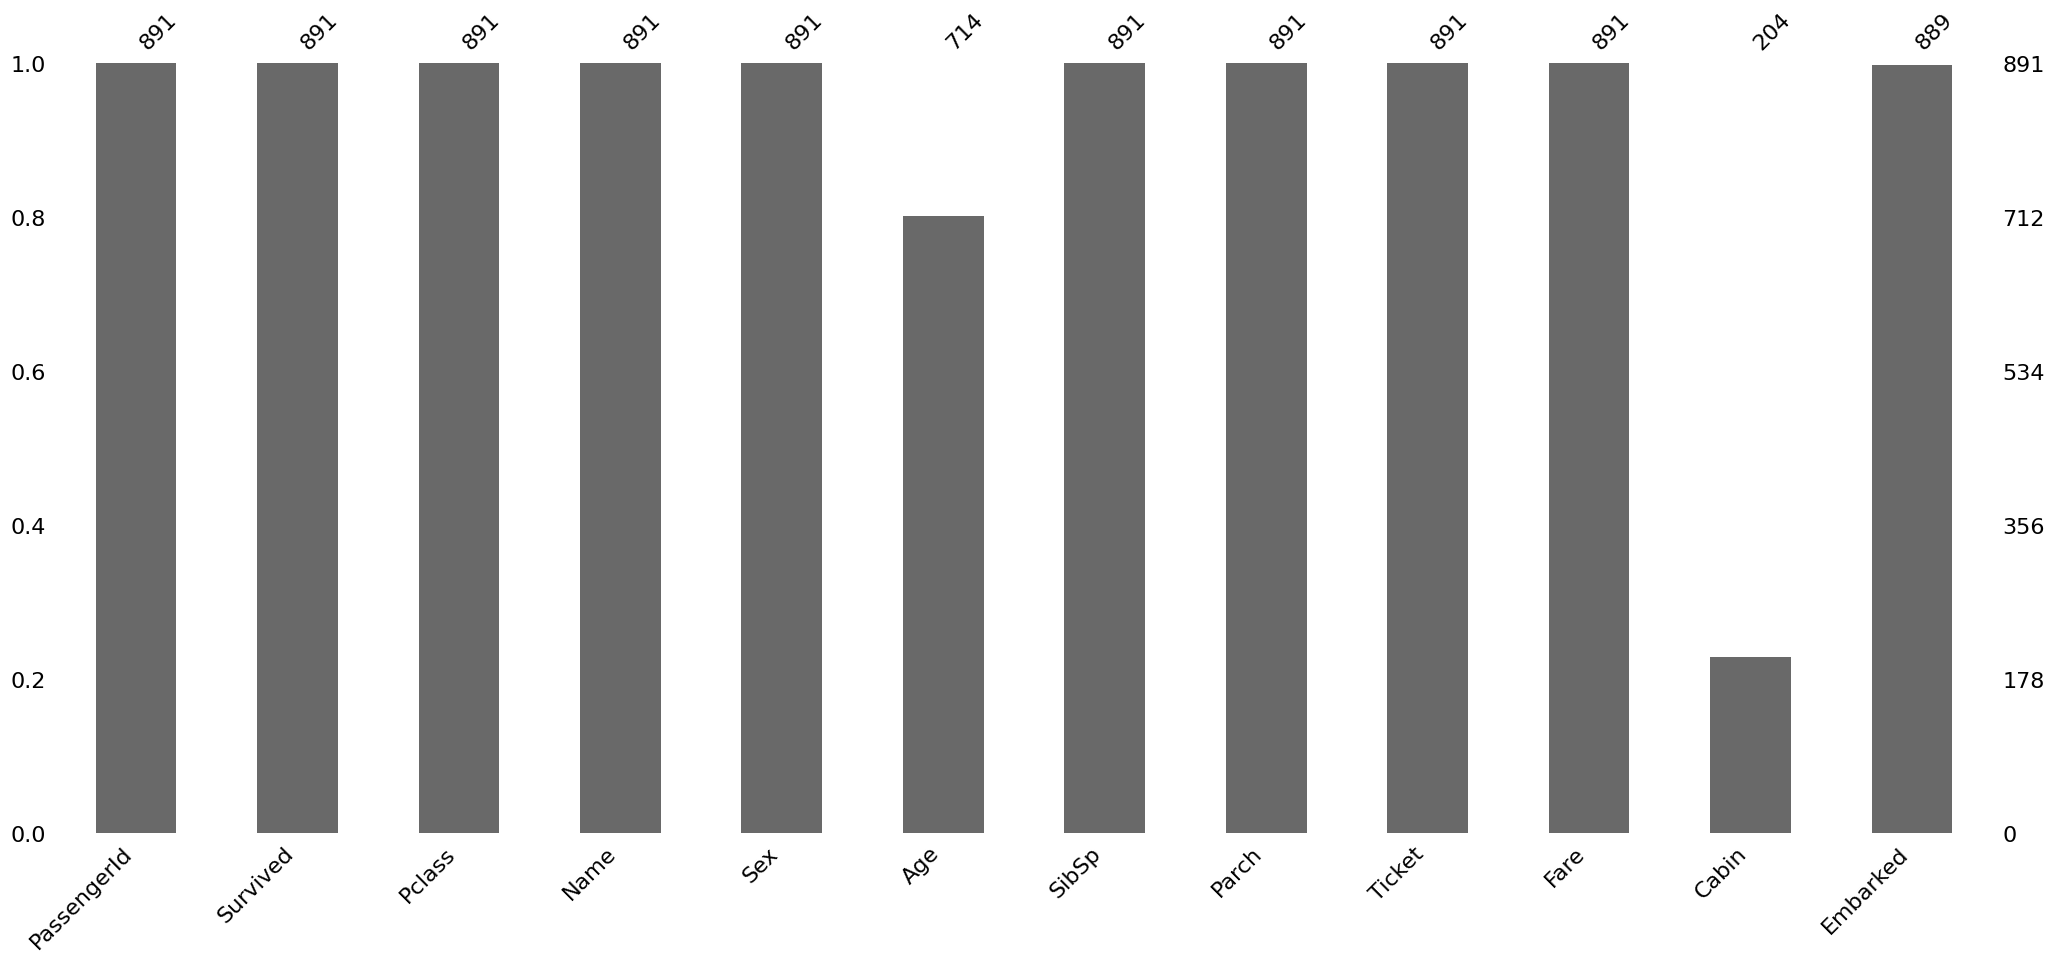

In [223]:
import pandas as pd
import missingno as msno
msno.bar(data)

# 2. Removing Irrelevant Features

Certain features can be removed from the dataset if they do no provide any value to the analysis

For instance, the ‘PassengerId’ column in our dataset , assuming it does’nt have any predictive power to predict the dependent variable, can be dropped.

In [224]:
data.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Missing Value Imputation

One possible way to to get rid of  missing value in data.

**Several methods can be employed to handle missing values within these features.**

> **Arbitrary Value Imputation**: If there’s a specific assumption about missing values . they can be replaced with an educated guess using the fillna method.

> **Mean/Median/Mode Imputation**: Numeric features  can be imputed with their mean, median, or mode using the fillna method.

>**Most Frequent Value Imputation**: Categorical features can be imputed with their most frequent value using the fillna method.

>**Advanced Imputation Techniques**: Forward fill, backward fill, interpolation, or machine learning-based methods like KNNImputer can also be employed for more sophisticated imputation.

**So int Our Dataset:**

> **Imputation for ‘Age’ (Numerical Feature):**

In [225]:
# Impute missing values for the 'Age' column using mean
data['Age'].fillna(data['Age'].mean(), inplace=True)

>**Imputation for ‘Embarked’ (Categorical Feature):**

In [226]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

After performing these imputations, we can check the dataset for missing values again to ensure that all missing values  have been handled:

In [227]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 3.Removing Duplicate Rows

Handling duplicates is an essential step in data cleaning to ensure that the dataset is free from redundant information. Here’s how you can identify and remove duplicate rows or observations in a dataset:


In [228]:
duplicated=data[data.duplicated()]
print("duplicated rows :" )
print(duplicated)

duplicated rows :
Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [229]:
data=data.drop_duplicates()

In [230]:
data.duplicated().sum()

0

# 4.Outlier Detection

What are outliers?
Outliers are data points that deviate significantly from the overall pattern of the dataset and can indicate atypical or rare cases.

To detect outliers in your dataset, Here are a few approaches:

# Outliers Identification

There are different ways and methods of identifying outliers, but we are only going to use some of the most popular techniques:

1. Visualization
2. Skewness
3. Interquartile Range
4. Standard Deviation

># Visualization

Outliers can be detected using different visualization methods, we are going to use :

* Boxplot
* Histogram

#  1.Box Plots:
boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).

outliers appears above or below the minimum and maximum of the boxplot.



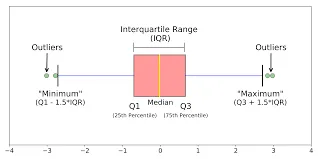

In [231]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

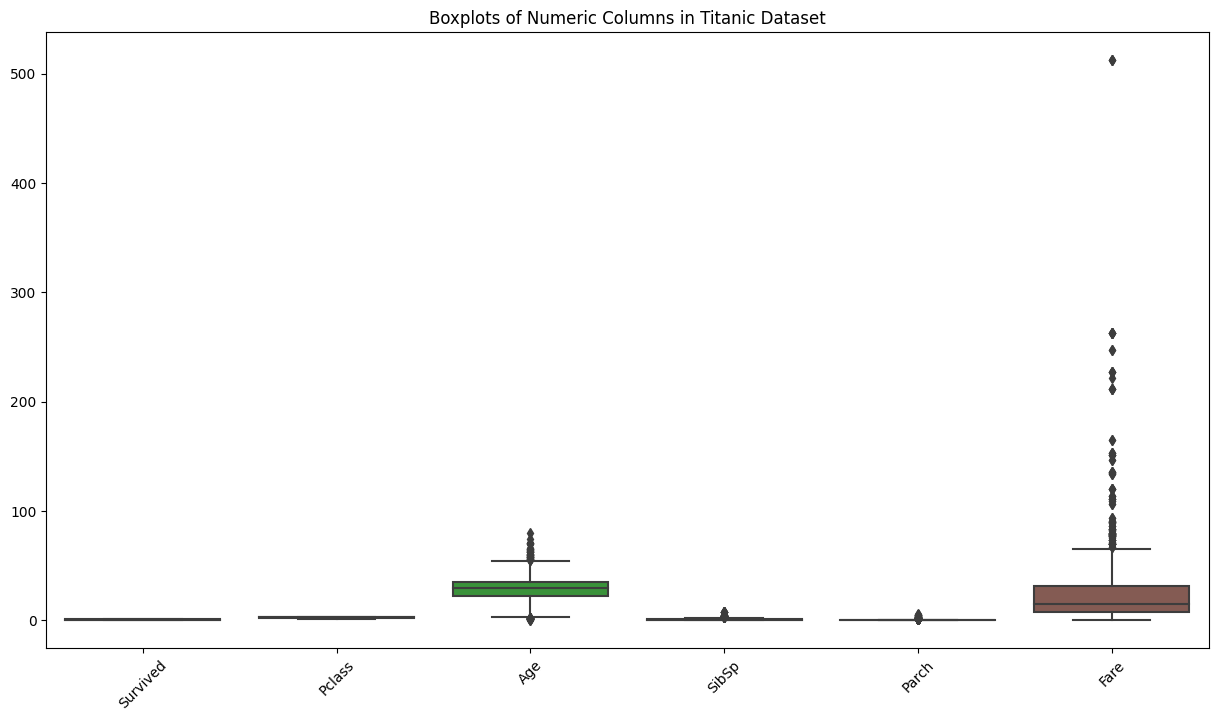

In [232]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplots of Numeric Columns in Titanic Dataset')
plt.xticks(rotation=45)
plt.show()

from the boxplot above, the black circular points  show the presence of extreme values in the variable.

# 2.Histogram

To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed, outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers.

<Figure size 2000x1000 with 0 Axes>

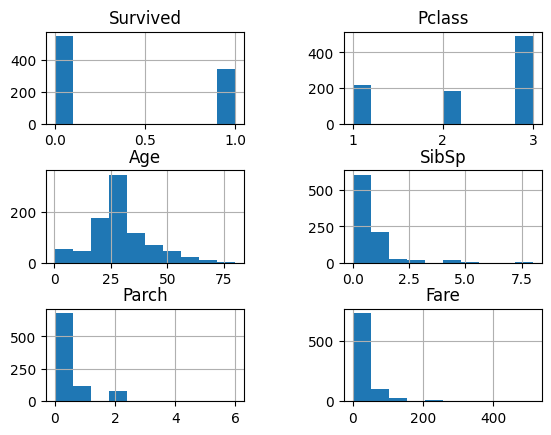

In [233]:
plt.figure(figsize=(20, 10))
data[numeric_columns].hist();
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # You can adjust the values of 'wspace' and 'hspace' as needed;


from the histogram above, the histogram appears to be distributed to the left, this also indicates the presence of outliers.

># Skewness

the skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [234]:
for col in numeric_columns:
    skewness_value = data[col].skew()
    print(f"Skewness value of {col}: {skewness_value}")

Skewness value of Survived: 0.4785234382949897
Skewness value of Pclass: -0.6305479068752845
Skewness value of Age: 0.4344880940129925
Skewness value of SibSp: 3.6953517271630565
Skewness value of Parch: 2.7491170471010933
Skewness value of Fare: 4.787316519674893


from the code above, the ‘Fare’ skewness value of 4.78 and 'SibSp' and'Parch', indicating the presence of outliers.

> # Interquartile Range(IQR):



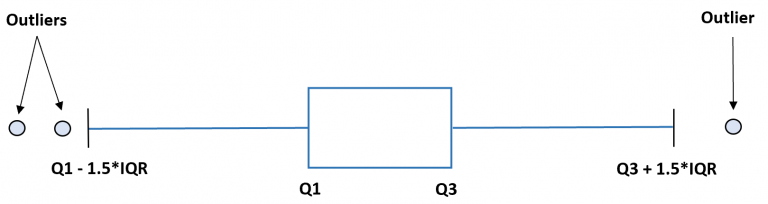

check this link for more understand :https://www.statology.org/find-outliers-with-iqr/

In [235]:
Q1=data['Fare'].quantile(0.25)
Q3=data['Fare'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

23.0896


In [236]:
whisker_width = 1.5
Outer_limit=data['Fare'] < Q1 - whisker_width*IQR
Upper_limit=data['Fare'] > Q3 + whisker_width*IQR

Fare_outliers = data[ Outer_limit | Upper_limit] 
Fare_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,263.0000,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,146.5208,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,82.1708,C
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,76.7292,C


this dataset "Fare_outliers" is the outliers in the original dataset getting  with a value less than the lower limit or greater than the upper limit 

# Outliers Treatment
* Flooring and Capping.
* Trimming.
* Replacing outliers with the mean, median, mode, or other values.

> # Flooring And Capping

1. Flooring: When a data point is below the lower limit, it is replaced with the lower_limit.

2. Capping: When a data point is above the upper limit, it is replaced with the Upper_limit .

In [237]:
'''def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5

    outer_limit = column < Q1 - whisker_width * IQR
    upper_limit = column > Q3 + whisker_width * IQR

    # Remove rows with outliers
    return column[~(outer_limit | upper_limit)]'''

def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5

    column.loc[column < Q1 - whisker_width * IQR] = Q1 - whisker_width * IQR
    column.loc[column > Q3 + whisker_width * IQR] = Q3 + whisker_width * IQR

    return column


In [243]:
Col=['Fare','Parch','SibSp','Age']
data_no_outliers = data[Col].apply(remove_outliers)
data = pd.concat([data.drop(columns=Col), data_no_outliers], axis=1)


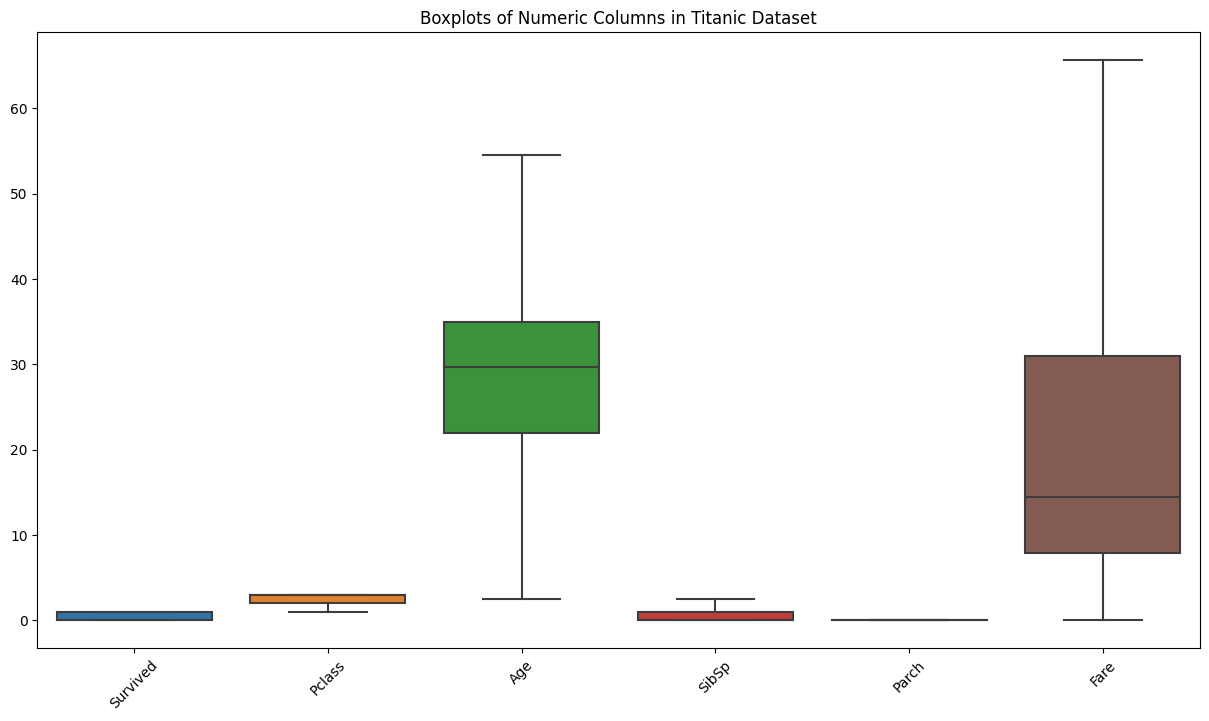

In [239]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplots of Numeric Columns in Titanic Dataset')
plt.xticks(rotation=45)
plt.show()

In [241]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Embarked', 'Fare', 'Parch',
       'SibSp', 'Age'],
      dtype='object')

In [244]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Embarked     object
Fare        float64
Parch         int64
SibSp       float64
Age         float64
dtype: object

# Univariate Data Analysis

 Bar Chart for Categorical Features
* Sex
* Pclass
* SibSp ( # of siblings and spouse)
* Parch ( # of parents and children)
* Embarked
* Cabin

<Axes: >

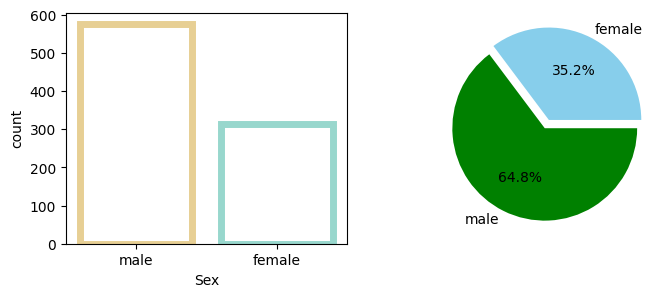

In [276]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
# count plot on single categorical variable
custom_palette = ['skyblue', 'green']
sns.countplot(x ='Sex', data = data,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2),ax=ax1)

data.groupby('Sex').size().plot(kind='pie', autopct='%1.1f%%',colors=custom_palette,explode = [0.1,0],ax=ax2)